In [1]:
# Install required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

Saving cleaned_Mumbai Real Estate.csv to cleaned_Mumbai Real Estate.csv


In [3]:
# Shape and first 5 rows
print(f"Shape: {df.shape}")
print(df.head())

# Data types
print("\n=== Data Types ===")
print(df.dtypes)

# Missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Descriptive statistics
print("\n=== Descriptive Statistics ===")
print(df.describe(include='all'))

Shape: (11376, 139)
      ID   Possession Status Availability Starts From Floor No  Commercial  \
0  12685  Under Construction                  Dec '25        5           0   
1  12684               Ready            Not Specified       20           1   
2  12683               Ready            Not Specified       18           0   
3  12682  Under Construction                  Dec '25        5           0   
4  12681  Under Construction                  Dec '24        8           1   

                               Developer Approved Authority Name  \
0                          Not Specified                    KDMC   
1  TATA Housing Development Company Ltd.                     TMC   
2                  Sai Satyam Developers                    KDMC   
3                          Birla Estates                    KDMC   
4                      Godrej Properties           Not Specified   

   Units Available      Price Price (English)  ... Meditation Area  \
0              1.0  3150000.0   

In [5]:
df['Price'] = df['Price (English)'].str.replace(' Lac', '').str.replace(' Cr', '00').str.replace('[^\d.]', '', regex=True).replace('', np.nan).astype(float)
df['Price'] = np.where(df['Price (English)'].str.contains('Cr'), df['Price']*100, df['Price'])*100000

In [6]:
df['Year Available'] = df['Year Available'].fillna(df['Availability Starts From'].str.extract('(\d{4})')[0])
df['Possession Status'] = df['Possession Status'].replace('Not Specified', np.nan)

/tmp/ipython-input-6-3100740084.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Year Available'] = df['Year Available'].fillna(df['Availability Starts From'].str.extract('(\d{4})')[0])


In [7]:
binary_cols = ['Commercial', 'Meditation Area', 'Multipurpose Courts',
               'Recreational Pool', 'Aesthetically designed landscape garden']
for col in binary_cols:
    df[col] = df[col].astype(bool)


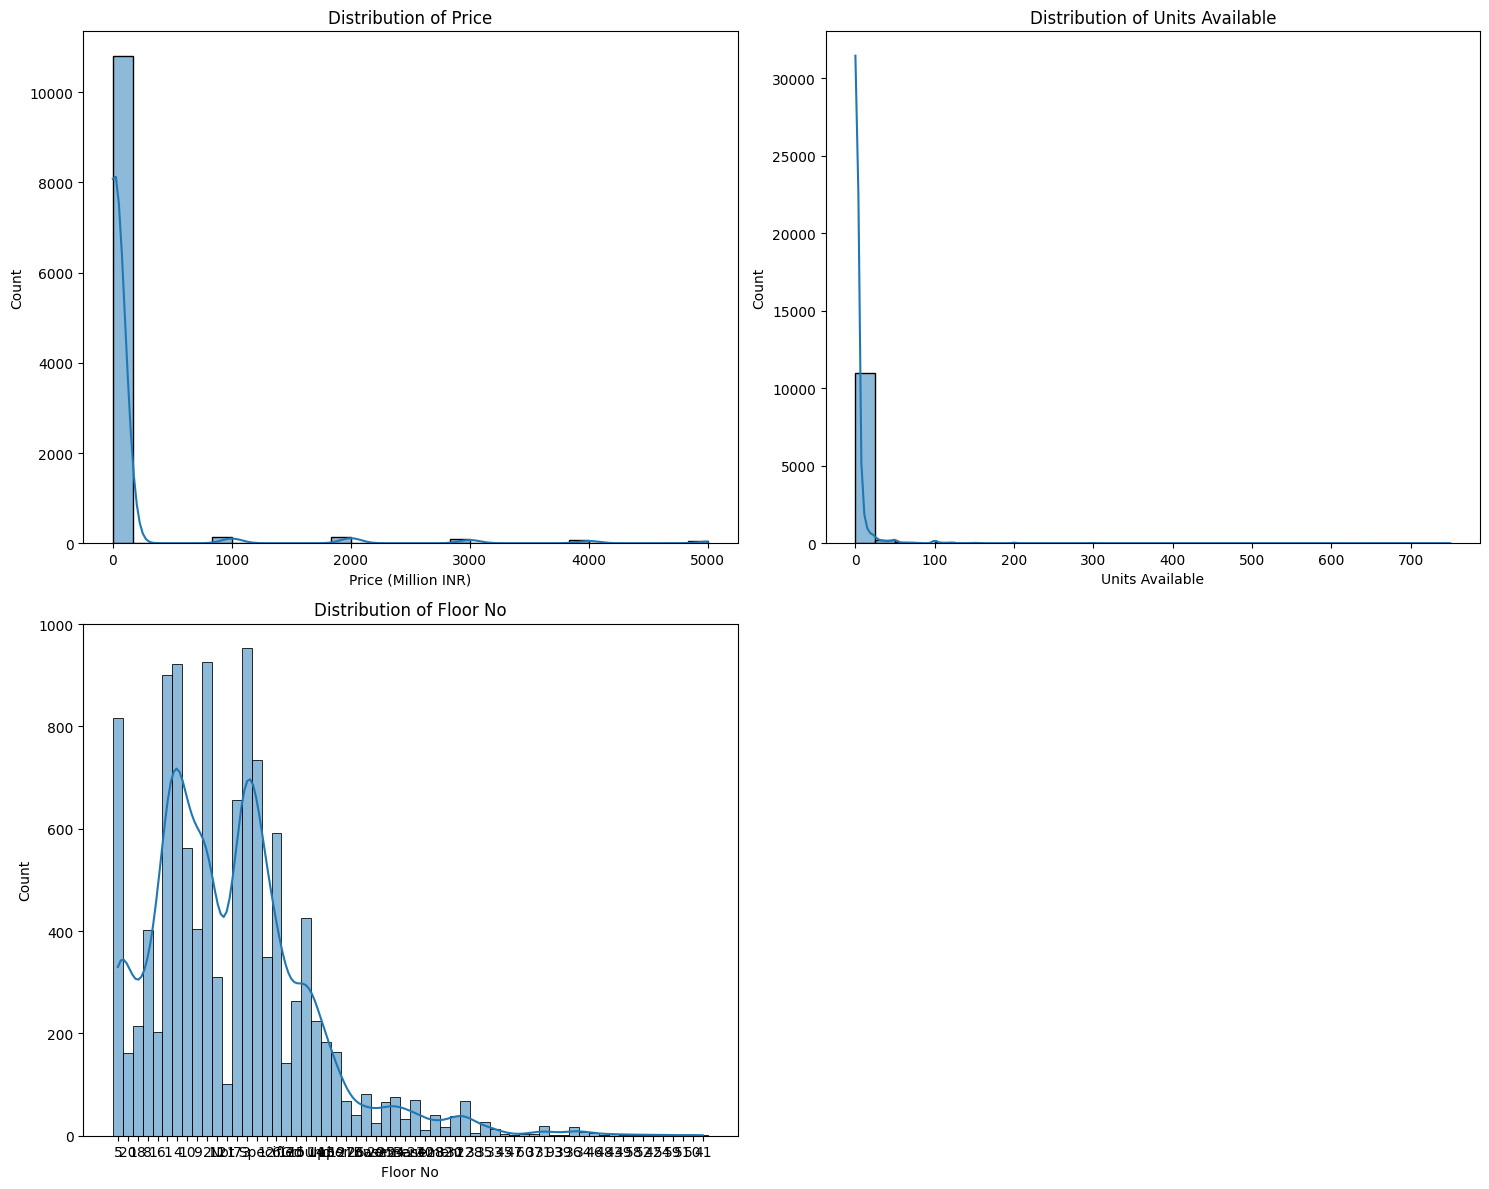

In [14]:
plt.figure(figsize=(15,12))

# Numerical features
num_cols = ['Price', 'Units Available', 'Floor No']
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    if 'Price' in col:
        sns.histplot(df[col]/1e6, bins=30, kde=True)  # Display in millions
        plt.xlabel('Price (Million INR)')
    else:
        sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

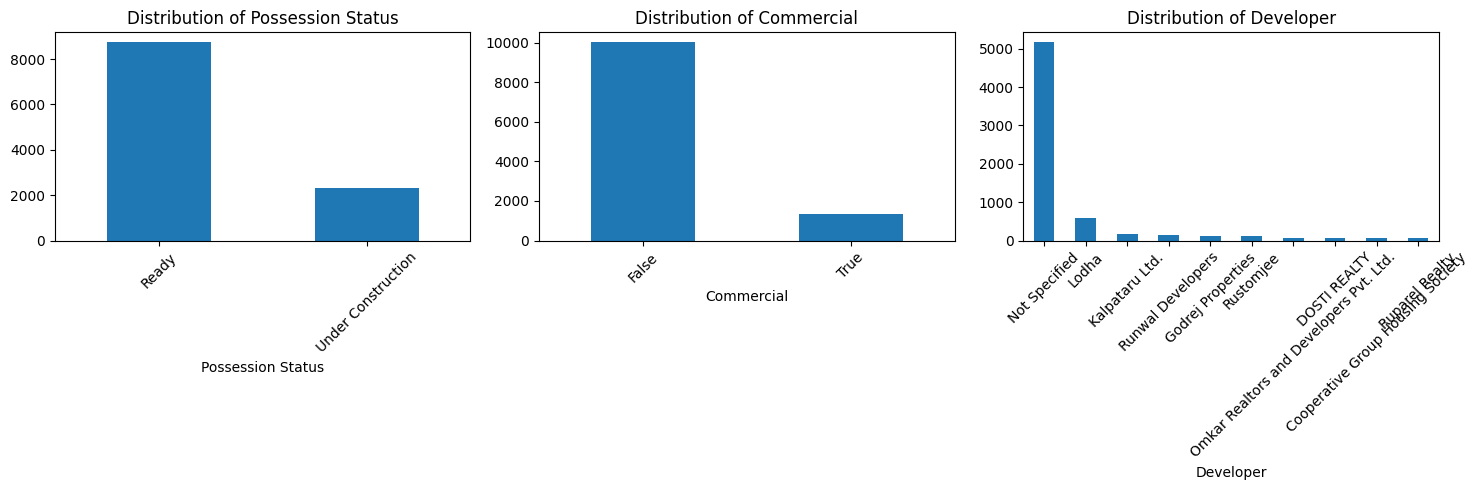

In [15]:
# Categorical features
cat_cols = ['Possession Status', 'Commercial', 'Developer']
plt.figure(figsize=(15,5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1,3,i)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
df['Floor_Category'] = pd.cut(df['Floor No'].replace(['Not Specified', 'Ground', 'Upper Basement'], np.nan).astype(float),
                             bins=[0, 5, 10, 20, 50, 100],
                             labels=['0-5', '5-10', '10-20', '20-50', '50+'])

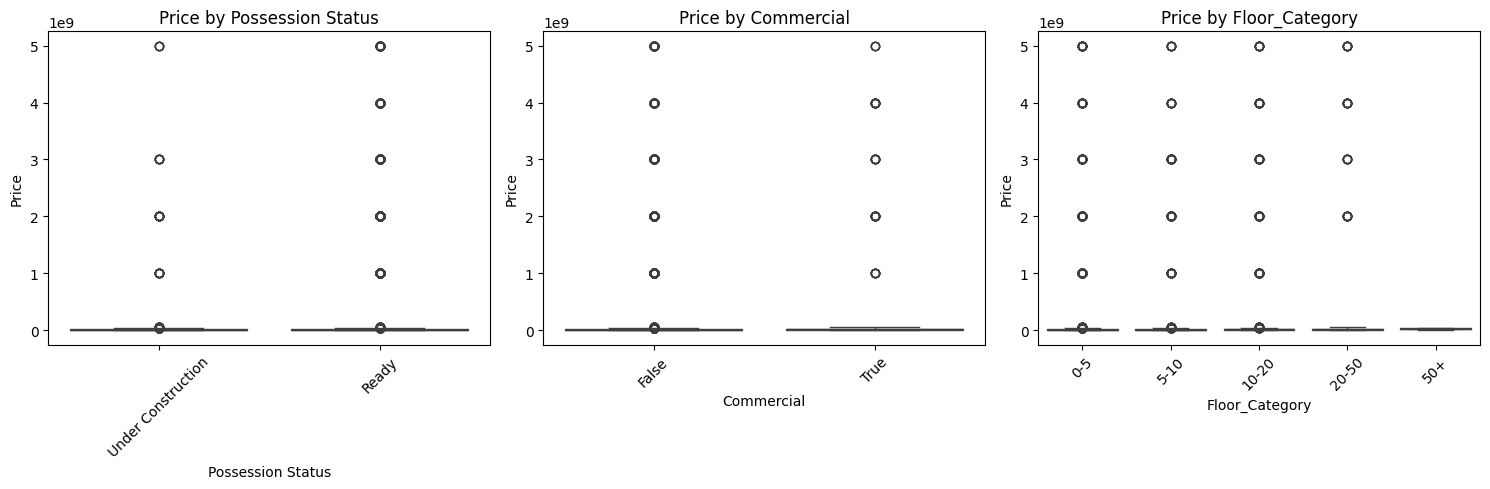

In [20]:
# Price vs Categorical Features
plt.figure(figsize=(15,5))
for i, col in enumerate(['Possession Status', 'Commercial', 'Floor_Category'], 1):
    plt.subplot(1,3,i)
    sns.boxplot(x=col, y='Price', data=df)
    plt.title(f'Price by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

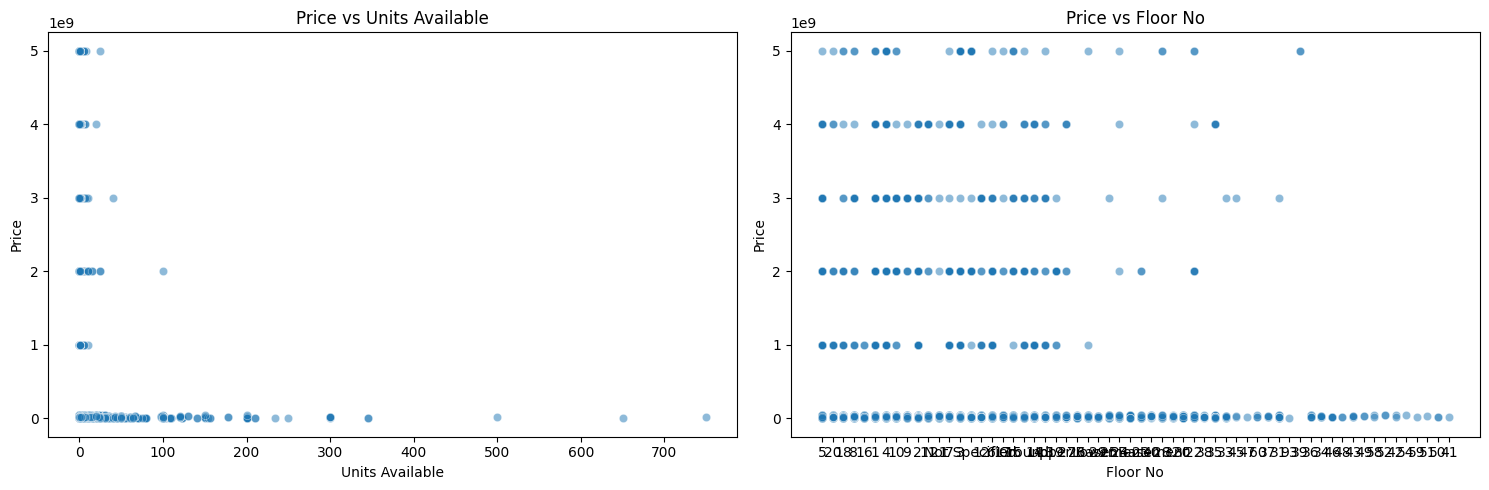

In [21]:
# Price vs Numerical Features
plt.figure(figsize=(15,5))
for i, col in enumerate(['Units Available', 'Floor No'], 1):
    plt.subplot(1,2,i)
    sns.scatterplot(x=col, y='Price', data=df, alpha=0.5)
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

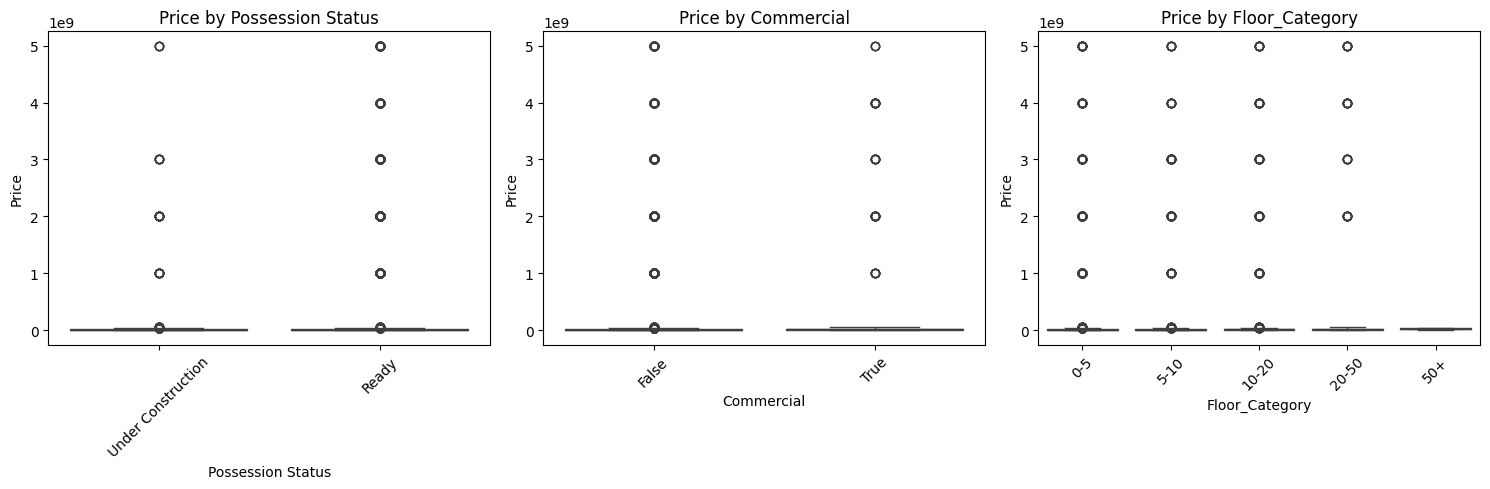

In [23]:
# Price vs Categorical Features
plt.figure(figsize=(15,5))
for i, col in enumerate(['Possession Status', 'Commercial', 'Floor_Category'], 1):
    plt.subplot(1,3,i)
    sns.boxplot(x=col, y='Price', data=df)
    plt.title(f'Price by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

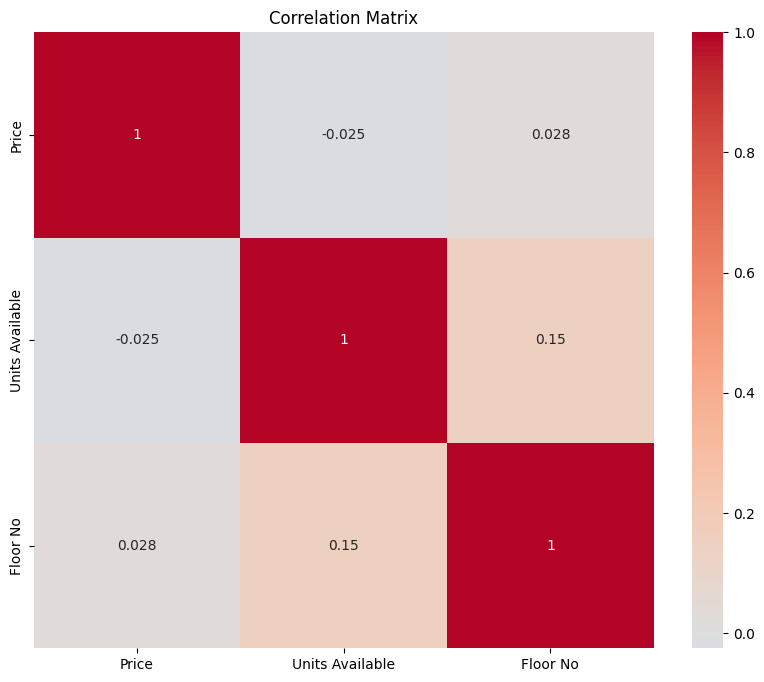

In [27]:
# Select numerical features for correlation
num_features = ['Price', 'Units Available', 'Floor No']

# Convert 'Floor No' to numeric, coercing errors to NaN
df['Floor No'] = pd.to_numeric(df['Floor No'], errors='coerce')

plt.figure(figsize=(10,8))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

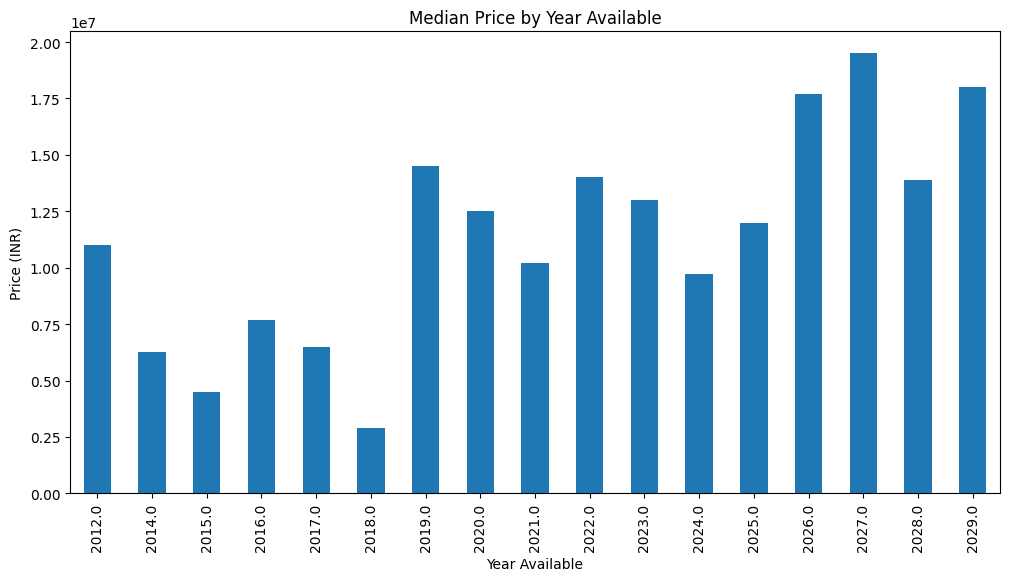

In [28]:
# Price trends over time
plt.figure(figsize=(12,6))
df.groupby('Year Available')['Price'].median().plot(kind='bar')
plt.title('Median Price by Year Available')
plt.ylabel('Price (INR)')
plt.show()

In [29]:
#  Save Processed Data
df.to_csv('cleaned_real_estate_data.csv', index=False)
files.download('cleaned_real_estate_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>